In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("insurance.csv", sep=';')

In [3]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


<div class="alert alert-block alert-info">
📝 <b>Zadanie 1</b><br>
    Przygotuj dane:
    <ul>
    <li>Przekształć zmienne tekstowe na zmienne binarne lub kategoryczne</li>
    <li>Wystandaryzuj dane numeryczne</li>
    <li>Dokonaj podziału na zbiory treningowe i testowe</li>
    </ul></div>

In [4]:
df["sex"]=df["sex"].apply(lambda x: 1 if x=="male" else 0)
df["smoker"]=df["smoker"].apply(lambda x: 1 if x=="yes" else 0)

In [ ]:
# df["sex"] = np.where(df["sex"] == 'female', 1, 0)
# or
# df2 = pd.get_dummies(df['sex'], drop_first = True)
# or
# df["sex"].map({'female':1, 'male':0})

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X = df[["age", "bmi", "children"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns=X.columns)
X_scaled.head()


,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [7]:
df[["age","bmi", "children"]]=X_scaled

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.1</b><br>
Przygotuj estymator modelu perceptrona wielowarstwowego o poniższych cechach:
<ul>
<li>architektura składająca się z 2 warstw ukrytych:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
<li>optymalizator wag neuronów (solver): adam</li>
<li>maksymalna liczba iteracji: 1000</li>
<li>rozmiar wsadu (batch size): 64</li>
<li>ziarno losowości (random_state): 42</li>
</ul>
Wytrenuj model na wystandaryzowanych danych treningowych.
</div>

In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
reg_model = MLPRegressor(
                        hidden_layer_sizes=(128, 64),
                        activation = 'relu',
                        solver = 'adam',
                        max_iter = 1000,
                        batch_size = 64,
                        random_state =42
                        )

In [12]:
reg_model.fit(X_train, y_train)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(128, 64), max_iter=1000,
             random_state=42)

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.2</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error

In [14]:
y_pred = reg_model.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)
# 88% jet wyjaśnialne przez nasz model

0.8826155375393566

In [15]:
mean_absolute_error(y_true = y_test, y_pred = y_pred)

2485.407461409065

<div class="alert alert-block alert-info">
<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.1</b><br>
Korzystając z biblioteki tensorflow, przygotuj architekturę sieci neuronowej o poniższych cechach:
<ul>
<li>2 warstwy ukryte:</li>
    <ul>
    <li>pierwsza warstwa ukryta o 128 neuronach</li>
    <li>druga warstwa ukryta o 64 neuronach</li>
    </ul>
<li>funkcja aktywacji dla warstw ukrytych: relu</li>
</ul>
</div>
</div>

In [16]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [17]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.2</b><br>
Skompiluj model, wykorzystując:<br>
<ul>
    <li>optimizer (optymalizator wag neuronów, solver): <i>adam</i></li>
<li>funkcję straty: <i>mean_squared_error</i></li>
</ul>
</div>

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.3</b><br>
Wytrenujmy powyższy model. Liczba epok równa 1000 i rozmiar batcha równy 64.
</div>

In [20]:
model.fit(X_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 2s 5ms/step - loss: 322435040.0000 - mean_absolute_error: 13345.4971
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 322384672.0000 - mean_absolute_error: 13343.7109
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 322294944.0000 - mean_absolute_error: 13340.6836
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 322134496.0000 - mean_absolute_error: 13335.3369
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 321850240.0000 - mean_absolute_error: 13326.3154
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 321407360.0000 - mean_absolute_error: 13312.0693
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 320717888.0000 - mean_absolute_error: 13290.8447
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 319734688.0000 - mean_absolute_error: 13260.4629
Epoch 9/1000
17/

17/17 [==============================] - 0s 4ms/step - loss: 66575964.0000 - mean_absolute_error: 6102.0713
Epoch 68/1000
17/17 [==============================] - 0s 4ms/step - loss: 65736016.0000 - mean_absolute_error: 6070.9224
Epoch 69/1000
17/17 [==============================] - 0s 4ms/step - loss: 64863752.0000 - mean_absolute_error: 6036.2461
Epoch 70/1000
17/17 [==============================] - 0s 3ms/step - loss: 64054848.0000 - mean_absolute_error: 6003.4399
Epoch 71/1000
17/17 [==============================] - 0s 3ms/step - loss: 63196980.0000 - mean_absolute_error: 5965.8101
Epoch 72/1000
17/17 [==============================] - 0s 3ms/step - loss: 62381132.0000 - mean_absolute_error: 5927.5083
Epoch 73/1000
17/17 [==============================] - 0s 4ms/step - loss: 61584032.0000 - mean_absolute_error: 5898.3623
Epoch 74/1000
17/17 [==============================] - 0s 3ms/step - loss: 60798404.0000 - mean_absolute_error: 5861.2144
Epoch 75/1000
17/17 [=================

Epoch 134/1000
17/17 [==============================] - 0s 4ms/step - loss: 36568200.0000 - mean_absolute_error: 4291.5737
Epoch 135/1000
17/17 [==============================] - 0s 4ms/step - loss: 36492748.0000 - mean_absolute_error: 4276.0347
Epoch 136/1000
17/17 [==============================] - 0s 4ms/step - loss: 36423388.0000 - mean_absolute_error: 4257.8003
Epoch 137/1000
17/17 [==============================] - 0s 5ms/step - loss: 36376032.0000 - mean_absolute_error: 4255.7798
Epoch 138/1000
17/17 [==============================] - 0s 4ms/step - loss: 36299936.0000 - mean_absolute_error: 4248.6953
Epoch 139/1000
17/17 [==============================] - 0s 5ms/step - loss: 36256508.0000 - mean_absolute_error: 4240.7095
Epoch 140/1000
17/17 [==============================] - 0s 4ms/step - loss: 36170940.0000 - mean_absolute_error: 4220.8916
Epoch 141/1000
17/17 [==============================] - 0s 4ms/step - loss: 36139588.0000 - mean_absolute_error: 4212.8911
Epoch 142/1000
1

17/17 [==============================] - 0s 5ms/step - loss: 34402008.0000 - mean_absolute_error: 3944.5322
Epoch 201/1000
17/17 [==============================] - 0s 3ms/step - loss: 34384796.0000 - mean_absolute_error: 3943.2598
Epoch 202/1000
17/17 [==============================] - 0s 3ms/step - loss: 34367656.0000 - mean_absolute_error: 3946.3926
Epoch 203/1000
17/17 [==============================] - 0s 4ms/step - loss: 34307636.0000 - mean_absolute_error: 3935.3154
Epoch 204/1000
17/17 [==============================] - 0s 3ms/step - loss: 34285816.0000 - mean_absolute_error: 3929.7576
Epoch 205/1000
17/17 [==============================] - 0s 3ms/step - loss: 34258360.0000 - mean_absolute_error: 3923.9868
Epoch 206/1000
17/17 [==============================] - 0s 3ms/step - loss: 34232900.0000 - mean_absolute_error: 3920.2148
Epoch 207/1000
17/17 [==============================] - 0s 4ms/step - loss: 34216264.0000 - mean_absolute_error: 3926.9229
Epoch 208/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 32611594.0000 - mean_absolute_error: 3752.9121
Epoch 267/1000
17/17 [==============================] - 0s 3ms/step - loss: 32583680.0000 - mean_absolute_error: 3748.1948
Epoch 268/1000
17/17 [==============================] - 0s 3ms/step - loss: 32542528.0000 - mean_absolute_error: 3747.0908
Epoch 269/1000
17/17 [==============================] - 0s 3ms/step - loss: 32526792.0000 - mean_absolute_error: 3748.0173
Epoch 270/1000
17/17 [==============================] - 0s 3ms/step - loss: 32511736.0000 - mean_absolute_error: 3752.7249
Epoch 271/1000
17/17 [==============================] - 0s 3ms/step - loss: 32463840.0000 - mean_absolute_error: 3740.5132
Epoch 272/1000
17/17 [==============================] - 0s 3ms/step - loss: 32431844.0000 - mean_absolute_error: 3730.6711
Epoch 273/1000
17/17 [==============================] - 0s 3ms/step - loss: 32394976.0000 - mean_absolute_error: 3731.1064
Epoch 274/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 30409316.0000 - mean_absolute_error: 3519.3745
Epoch 333/1000
17/17 [==============================] - 0s 3ms/step - loss: 30380180.0000 - mean_absolute_error: 3509.0496
Epoch 334/1000
17/17 [==============================] - 0s 3ms/step - loss: 30318540.0000 - mean_absolute_error: 3499.0330
Epoch 335/1000
17/17 [==============================] - 0s 4ms/step - loss: 30305436.0000 - mean_absolute_error: 3507.4851
Epoch 336/1000
17/17 [==============================] - 0s 3ms/step - loss: 30262192.0000 - mean_absolute_error: 3505.3738
Epoch 337/1000
17/17 [==============================] - 0s 4ms/step - loss: 30215230.0000 - mean_absolute_error: 3492.9463
Epoch 338/1000
17/17 [==============================] - 0s 4ms/step - loss: 30177456.0000 - mean_absolute_error: 3483.2952
Epoch 339/1000
17/17 [==============================] - 0s 4ms/step - loss: 30143668.0000 - mean_absolute_error: 3482.3259
Epoch 340/1000
17/17 [=========

17/17 [==============================] - 0s 4ms/step - loss: 27934222.0000 - mean_absolute_error: 3269.3462
Epoch 399/1000
17/17 [==============================] - 0s 3ms/step - loss: 27894724.0000 - mean_absolute_error: 3270.1013
Epoch 400/1000
17/17 [==============================] - 0s 4ms/step - loss: 27866452.0000 - mean_absolute_error: 3258.5894
Epoch 401/1000
17/17 [==============================] - 0s 4ms/step - loss: 27820914.0000 - mean_absolute_error: 3255.2112
Epoch 402/1000
17/17 [==============================] - 0s 4ms/step - loss: 27787440.0000 - mean_absolute_error: 3265.4155
Epoch 403/1000
17/17 [==============================] - 0s 4ms/step - loss: 27759104.0000 - mean_absolute_error: 3265.7251
Epoch 404/1000
17/17 [==============================] - 0s 3ms/step - loss: 27715532.0000 - mean_absolute_error: 3245.4241
Epoch 405/1000
17/17 [==============================] - 0s 3ms/step - loss: 27669694.0000 - mean_absolute_error: 3236.7107
Epoch 406/1000
17/17 [=========

17/17 [==============================] - 0s 4ms/step - loss: 25405892.0000 - mean_absolute_error: 3038.2310
Epoch 465/1000
17/17 [==============================] - 0s 4ms/step - loss: 25375096.0000 - mean_absolute_error: 3032.5671
Epoch 466/1000
17/17 [==============================] - 0s 3ms/step - loss: 25342358.0000 - mean_absolute_error: 3030.6326
Epoch 467/1000
17/17 [==============================] - 0s 3ms/step - loss: 25292944.0000 - mean_absolute_error: 3018.7905
Epoch 468/1000
17/17 [==============================] - 0s 3ms/step - loss: 25250138.0000 - mean_absolute_error: 3013.2737
Epoch 469/1000
17/17 [==============================] - 0s 3ms/step - loss: 25218360.0000 - mean_absolute_error: 3013.7148
Epoch 470/1000
17/17 [==============================] - 0s 4ms/step - loss: 25185760.0000 - mean_absolute_error: 3005.5852
Epoch 471/1000
17/17 [==============================] - 0s 3ms/step - loss: 25133266.0000 - mean_absolute_error: 2993.5198
Epoch 472/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 23255622.0000 - mean_absolute_error: 2826.4011
Epoch 531/1000
17/17 [==============================] - 0s 3ms/step - loss: 23239568.0000 - mean_absolute_error: 2803.3267
Epoch 532/1000
17/17 [==============================] - 0s 5ms/step - loss: 23203692.0000 - mean_absolute_error: 2816.2507
Epoch 533/1000
17/17 [==============================] - 0s 5ms/step - loss: 23181726.0000 - mean_absolute_error: 2810.8618
Epoch 534/1000
17/17 [==============================] - 0s 5ms/step - loss: 23153374.0000 - mean_absolute_error: 2798.4968
Epoch 535/1000
17/17 [==============================] - 0s 4ms/step - loss: 23129144.0000 - mean_absolute_error: 2802.2009
Epoch 536/1000
17/17 [==============================] - 0s 5ms/step - loss: 23108274.0000 - mean_absolute_error: 2796.4158
Epoch 537/1000
17/17 [==============================] - 0s 6ms/step - loss: 23090952.0000 - mean_absolute_error: 2788.3850
Epoch 538/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 22177934.0000 - mean_absolute_error: 2707.4692
Epoch 597/1000
17/17 [==============================] - 0s 3ms/step - loss: 22167152.0000 - mean_absolute_error: 2702.8240
Epoch 598/1000
17/17 [==============================] - 0s 3ms/step - loss: 22158074.0000 - mean_absolute_error: 2683.2280
Epoch 599/1000
17/17 [==============================] - 0s 4ms/step - loss: 22154408.0000 - mean_absolute_error: 2688.1665
Epoch 600/1000
17/17 [==============================] - 0s 3ms/step - loss: 22140672.0000 - mean_absolute_error: 2705.2288
Epoch 601/1000
17/17 [==============================] - 0s 4ms/step - loss: 22125188.0000 - mean_absolute_error: 2702.8442
Epoch 602/1000
17/17 [==============================] - 0s 4ms/step - loss: 22119456.0000 - mean_absolute_error: 2679.3545
Epoch 603/1000
17/17 [==============================] - 0s 4ms/step - loss: 22110460.0000 - mean_absolute_error: 2693.5103
Epoch 604/1000
17/17 [=========

17/17 [==============================] - 0s 5ms/step - loss: 21676324.0000 - mean_absolute_error: 2658.9607
Epoch 663/1000
17/17 [==============================] - 0s 4ms/step - loss: 21680012.0000 - mean_absolute_error: 2657.1272
Epoch 664/1000
17/17 [==============================] - 0s 4ms/step - loss: 21662464.0000 - mean_absolute_error: 2659.5649
Epoch 665/1000
17/17 [==============================] - 0s 3ms/step - loss: 21664594.0000 - mean_absolute_error: 2679.7571
Epoch 666/1000
17/17 [==============================] - 0s 3ms/step - loss: 21665076.0000 - mean_absolute_error: 2658.4006
Epoch 667/1000
17/17 [==============================] - 0s 3ms/step - loss: 21648318.0000 - mean_absolute_error: 2656.1162
Epoch 668/1000
17/17 [==============================] - 0s 4ms/step - loss: 21645598.0000 - mean_absolute_error: 2666.4736
Epoch 669/1000
17/17 [==============================] - 0s 3ms/step - loss: 21636842.0000 - mean_absolute_error: 2676.6030
Epoch 670/1000
17/17 [=========

17/17 [==============================] - 0s 5ms/step - loss: 21334736.0000 - mean_absolute_error: 2620.3599
Epoch 729/1000
17/17 [==============================] - 0s 4ms/step - loss: 21329050.0000 - mean_absolute_error: 2625.0852
Epoch 730/1000
17/17 [==============================] - 0s 4ms/step - loss: 21330966.0000 - mean_absolute_error: 2630.1917
Epoch 731/1000
17/17 [==============================] - 0s 4ms/step - loss: 21330644.0000 - mean_absolute_error: 2635.1331
Epoch 732/1000
17/17 [==============================] - 0s 4ms/step - loss: 21319322.0000 - mean_absolute_error: 2609.0950
Epoch 733/1000
17/17 [==============================] - 0s 4ms/step - loss: 21317480.0000 - mean_absolute_error: 2600.5061
Epoch 734/1000
17/17 [==============================] - 0s 4ms/step - loss: 21306562.0000 - mean_absolute_error: 2624.8003
Epoch 735/1000
17/17 [==============================] - 0s 4ms/step - loss: 21309282.0000 - mean_absolute_error: 2651.7021
Epoch 736/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 21087116.0000 - mean_absolute_error: 2604.3628
Epoch 795/1000
17/17 [==============================] - 0s 5ms/step - loss: 21091884.0000 - mean_absolute_error: 2594.6499
Epoch 796/1000
17/17 [==============================] - 0s 4ms/step - loss: 21089640.0000 - mean_absolute_error: 2593.4539
Epoch 797/1000
17/17 [==============================] - 0s 4ms/step - loss: 21089740.0000 - mean_absolute_error: 2600.2007
Epoch 798/1000
17/17 [==============================] - 0s 4ms/step - loss: 21073938.0000 - mean_absolute_error: 2607.0745
Epoch 799/1000
17/17 [==============================] - 0s 5ms/step - loss: 21076232.0000 - mean_absolute_error: 2587.9961
Epoch 800/1000
17/17 [==============================] - 0s 4ms/step - loss: 21071716.0000 - mean_absolute_error: 2599.3916
Epoch 801/1000
17/17 [==============================] - 0s 4ms/step - loss: 21073274.0000 - mean_absolute_error: 2609.6699
Epoch 802/1000
17/17 [=========

17/17 [==============================] - 0s 3ms/step - loss: 20899488.0000 - mean_absolute_error: 2575.2593
Epoch 861/1000
17/17 [==============================] - 0s 4ms/step - loss: 20910270.0000 - mean_absolute_error: 2561.4810
Epoch 862/1000
17/17 [==============================] - 0s 3ms/step - loss: 20896210.0000 - mean_absolute_error: 2595.7373
Epoch 863/1000
17/17 [==============================] - 0s 3ms/step - loss: 20878538.0000 - mean_absolute_error: 2575.3774
Epoch 864/1000
17/17 [==============================] - 0s 3ms/step - loss: 20893330.0000 - mean_absolute_error: 2576.9253
Epoch 865/1000
17/17 [==============================] - 0s 3ms/step - loss: 20886088.0000 - mean_absolute_error: 2560.6826
Epoch 866/1000
17/17 [==============================] - 0s 3ms/step - loss: 20882472.0000 - mean_absolute_error: 2556.0771
Epoch 867/1000
17/17 [==============================] - 0s 3ms/step - loss: 20878836.0000 - mean_absolute_error: 2563.2671
Epoch 868/1000
17/17 [=========

17/17 [==============================] - 0s 4ms/step - loss: 20747244.0000 - mean_absolute_error: 2565.8337
Epoch 927/1000
17/17 [==============================] - 0s 4ms/step - loss: 20762238.0000 - mean_absolute_error: 2562.3835
Epoch 928/1000
17/17 [==============================] - 0s 3ms/step - loss: 20749994.0000 - mean_absolute_error: 2560.3318
Epoch 929/1000
17/17 [==============================] - 0s 3ms/step - loss: 20751542.0000 - mean_absolute_error: 2556.7769
Epoch 930/1000
17/17 [==============================] - 0s 3ms/step - loss: 20738222.0000 - mean_absolute_error: 2557.3921
Epoch 931/1000
17/17 [==============================] - 0s 3ms/step - loss: 20748748.0000 - mean_absolute_error: 2590.5308
Epoch 932/1000
17/17 [==============================] - 0s 4ms/step - loss: 20767736.0000 - mean_absolute_error: 2533.4578
Epoch 933/1000
17/17 [==============================] - 0s 3ms/step - loss: 20736720.0000 - mean_absolute_error: 2548.1885
Epoch 934/1000
17/17 [=========

17/17 [==============================] - 0s 5ms/step - loss: 20663388.0000 - mean_absolute_error: 2533.9031
Epoch 993/1000
17/17 [==============================] - 0s 4ms/step - loss: 20657238.0000 - mean_absolute_error: 2571.5903
Epoch 994/1000
17/17 [==============================] - 0s 4ms/step - loss: 20657744.0000 - mean_absolute_error: 2552.8513
Epoch 995/1000
17/17 [==============================] - 0s 5ms/step - loss: 20645906.0000 - mean_absolute_error: 2561.1821
Epoch 996/1000
17/17 [==============================] - 0s 3ms/step - loss: 20649554.0000 - mean_absolute_error: 2541.7998
Epoch 997/1000
17/17 [==============================] - 0s 4ms/step - loss: 20657832.0000 - mean_absolute_error: 2566.8403
Epoch 998/1000
17/17 [==============================] - 0s 3ms/step - loss: 20642172.0000 - mean_absolute_error: 2563.3396
Epoch 999/1000
17/17 [==============================] - 0s 3ms/step - loss: 20643606.0000 - mean_absolute_error: 2529.7498
Epoch 1000/1000
17/17 [========

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3.4</b><br>
Dokonaj prognozy zbioru testowego. Oblicz wartość współczynnika R2.</div>

In [21]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [22]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8807403079890893

In [23]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

2434.9849161751395

# Walidacja

In [24]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [26]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0)

In [27]:
model_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

In [28]:
import matplotlib.pyplot as plt

In [29]:
epochs = 1000

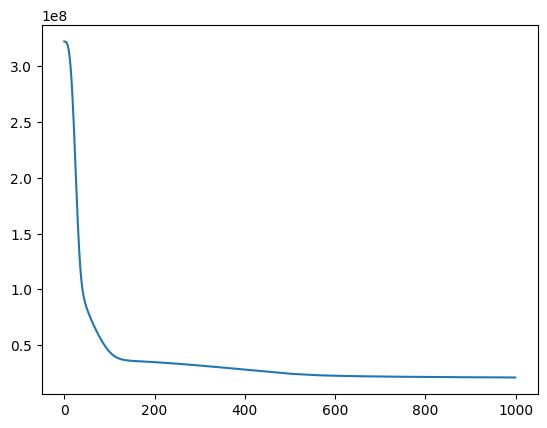

In [30]:
plt.plot(list(range(epochs)), model_hist.history['loss'])
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [32]:
model = models.Sequential()
model.add(Dense(units =128, activation = 'relu', input_shape =(X_train.shape[1], ))) #pierwsza warstwa ukryta
model.add(Dense(units =64, activation = 'relu')) #druga warstwa ukryta
model.add(Dense(units = 1)) # warstwa wyjsciowa

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [34]:
model_hist = model.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=0, validation_data=(X_val, y_val))

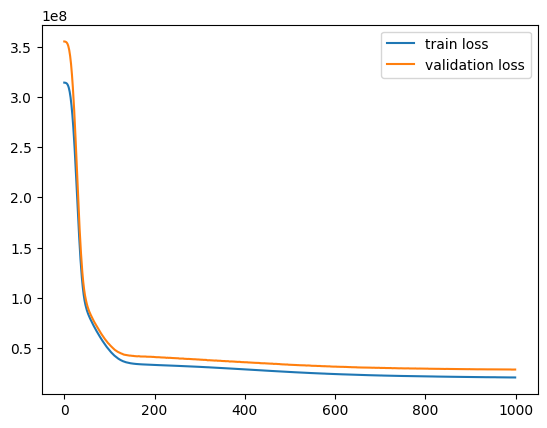

In [35]:
plt.plot(list(range(epochs)), model_hist.history['loss'], label='train loss')
plt.plot(list(range(epochs)), model_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()